In [1]:
from scipy.signal import fftconvolve, convolve2d
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

# settings

In [2]:
simulation = "/home/gijs/Work/spiel/runs/second_kat7_2018-05-28/results/"
neural_output = "/home/gijs/Work/astro-pix2pix/scratch/spiel_test_kat7/fits/"
number = 401

# preface

In [25]:
psf_path = "{}{}-wsclean-psfbig.fits".format(simulation, number)
skymodel_path = "{}{}-skymodel.fits".format(simulation, number)
dirty_path = "{}{}-wsclean-dirty.fits".format(simulation, number)
wsmodel_path = "{}{}-wsclean-model.fits".format(simulation, number)

In [26]:
psf = fits.open(psf_path)[0].data.squeeze()
psf = psf / psf.max()
skymodel = fits.open(skymodel_path)[0].data.squeeze() # the skymodel used as input to the telescope sim pipeline
dirty = fits.open(dirty_path)[0].data.squeeze()       # dirty image created by wsclean
wsmodel = fits.open(wsmodel_path)[0].data.squeeze()       # model image created by wsclean

# preview

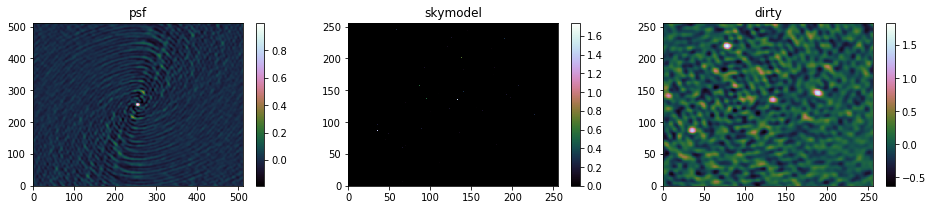

In [11]:
f, (a1, a2, a3) = plt.subplots(1, 3, figsize=(16, 3))
i1 = a1.pcolor(psf, cmap='cubehelix')
f.colorbar(i1, ax=a1)
a1.set_title('psf')
i2 = a2.pcolor(skymodel, cmap='cubehelix')
f.colorbar(i2, ax=a2)
_ = a2.set_title('skymodel')
i3 = a3.pcolor(dirty, cmap='cubehelix')
f.colorbar(i3, ax=a3)
_ = a3.set_title('dirty')

# Convolving

In [28]:
convolved = fftconvolve(skymodel, psf, mode="same")
convolved_ws = fftconvolve(wsmodel, psf, mode="same")

In [18]:
p = psf.shape[0]
r = slice(p//2, -p//2+1)    # uneven PSF needs +2, even psf +1
convolved2 = fftconvolve(skymodel, psf, mode="full")[r,r]

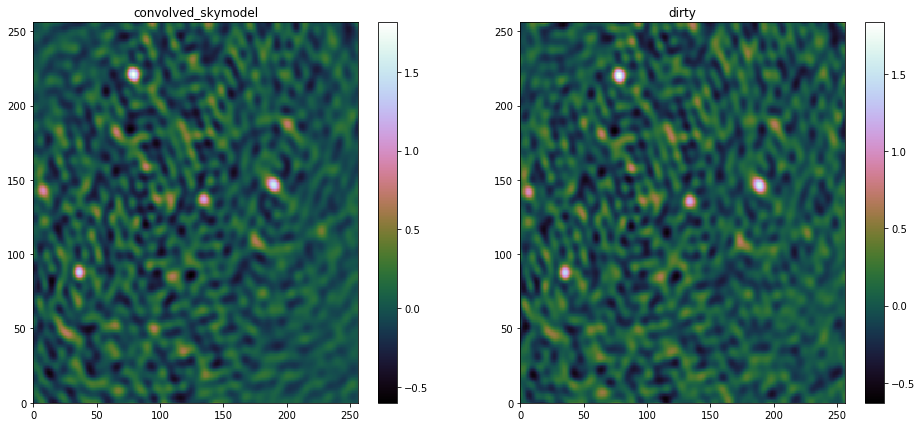

In [29]:
f, (a1, a2) = plt.subplots(1, 2, figsize=(16,7))
i1 = a1.pcolor(convolved_skymodel, cmap='cubehelix')
f.colorbar(i1, ax=a1)
a1.set_title('convolved_skymodel')
i2 = a2.pcolor(dirty, cmap='cubehelix')
f.colorbar(i2, ax=a2)
_ = a2.set_title('dirty')

# Risidual

In [30]:
risidual = dirty - convolved
risidual2 = dirty - convolved2
risidual_ws = dirty - convolved_ws

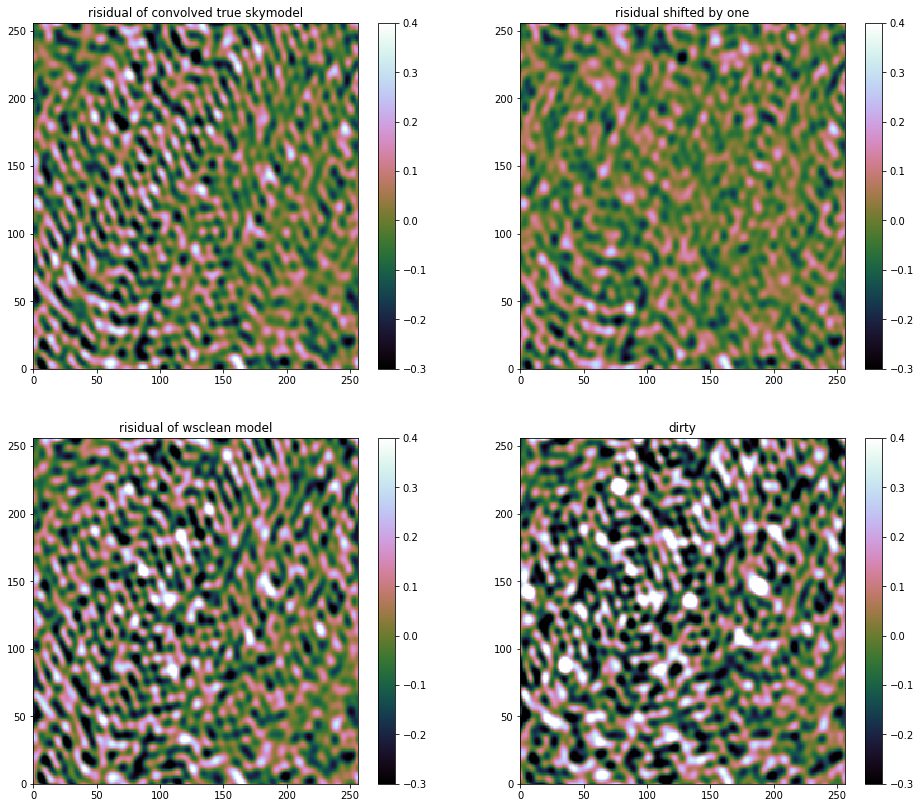

In [37]:
f, ((a1, a2), (a3, a4)) = plt.subplots(2, 2, figsize= [16, 14])
i1 = a1.pcolor(risidual, cmap='cubehelix', vmin=-0.3, vmax=0.4)
f.colorbar(i1, ax=a1)
a1.set_title('risidual of convolved true skymodel')
i2 = a2.pcolor(risidual2, cmap='cubehelix', vmin=-0.3, vmax=0.4)
f.colorbar(i2, ax=a2)
_ = a2.set_title('risidual shifted by one')
i3 = a3.pcolor(risidual_ws, cmap='cubehelix', vmin=-0.3, vmax=0.4)
f.colorbar(i3, ax=a3)
_ = a3.set_title('risidual of wsclean model')
i4 = a4.pcolor(dirty, cmap='cubehelix', vmin=-0.3, vmax=0.4)
f.colorbar(i4, ax=a4)
_ = a4.set_title('dirty')